# MIS 581 Capstone Project
## Purpose: 
### Exploration and analysis of selected data set

In [1]:
%config IPCompleter.greedy=True
from sys import stdout
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score
from scipy import stats
import random
from datetime import datetime

In [2]:
sns.set_palette('deep')

In [3]:
ms_telemetry = pd.read_csv('data/Microsoft Dataset/predictive modeling telemetry.csv')
ms_telemetry['datetime'] = pd.to_datetime(ms_telemetry['datetime'], format='%m/%d/%Y %I:%M:%S %p')
ms_telemetry.set_index(['datetime','machineID'], inplace=True)
ms_telemetry

,,volt,rotate,pressure,vibration
datetime,machineID,,,,
2015-01-01 06:00:00,1,176.217853,418.504078,113.077935,45.087686
2015-01-01 07:00:00,1,162.879223,402.747490,95.460525,43.413973
2015-01-01 08:00:00,1,170.989902,527.349825,75.237905,34.178847
2015-01-01 09:00:00,1,162.462833,346.149335,109.248561,41.122144
2015-01-01 10:00:00,1,157.610021,435.376873,111.886648,25.990511
...,...,...,...,...,...
2016-01-01 02:00:00,100,179.438162,395.222827,102.290715,50.771941
2016-01-01 03:00:00,100,189.617555,446.207972,98.180607,35.123072
2016-01-01 04:00:00,100,192.483414,447.816524,94.132837,48.314561


In [4]:
ms_telemetry.describe()

,volt,rotate,pressure,vibration
count,876100.000000,876100.000000,876100.000000,876100.000000
mean,170.777736,446.605119,100.858668,40.385007
std,15.509114,52.673886,11.048679,5.370361
min,97.333604,138.432075,51.237106,14.877054
25%,160.304927,412.305714,93.498181,36.777299
50%,170.607338,447.558150,100.425559,40.237247
75%,181.004493,482.176600,107.555231,43.784938
max,255.124717,695.020984,185.951998,76.791072


In [5]:
ms_machines = pd.read_csv('data/Microsoft Dataset/predictive modeling machines.csv')
ms_machines = ms_machines.set_index(['machineID', 'age', 'model'])
ms_machines

,,
machineID,age,model
1,18,model3
2,7,model4
3,8,model3
4,7,model3
5,2,model3
...,...,...
96,10,model2
97,14,model2
98,20,model2


In [6]:
ms_error = pd.read_csv('data/Microsoft Dataset/predictive modelling errors.csv')
ms_error['datetime'] = pd.to_datetime(ms_error['datetime'], format='%m/%d/%Y %I:%M:%S %p')
ms_error.set_index(['datetime', 'machineID', 'errorID'], inplace=True)
ms_error['error_count'] = 1
ms_error

,,,error_count
datetime,machineID,errorID,
2015-01-03 07:00:00,1,error1,1
2015-01-03 20:00:00,1,error3,1
2015-01-04 06:00:00,1,error5,1
2015-01-10 15:00:00,1,error4,1
2015-01-22 10:00:00,1,error4,1
...,...,...,...
2015-11-21 08:00:00,100,error2,1
2015-12-04 02:00:00,100,error1,1
2015-12-08 06:00:00,100,error2,1


In [7]:
ms_failure = pd.read_csv('data/Microsoft Dataset/predictive modelling failures.csv')
ms_failure['datetime'] = pd.to_datetime(ms_failure['datetime'], format='%m/%d/%Y %I:%M:%S %p')
ms_failure.set_index(['datetime', 'machineID', 'failure'], inplace=True)
ms_failure['failure_count'] = 1
ms_failure

,,,failure_count
datetime,machineID,failure,
2015-01-05 06:00:00,1,comp4,1
2015-03-06 06:00:00,1,comp1,1
2015-04-20 06:00:00,1,comp2,1
2015-06-19 06:00:00,1,comp4,1
2015-09-02 06:00:00,1,comp4,1
...,...,...,...
2015-11-29 06:00:00,99,comp3,1
2015-12-14 06:00:00,99,comp4,1
2015-02-12 06:00:00,100,comp1,1


In [8]:
#pivot machine model column
#ms_models = pd.pivot_table(ms_machines, values=['model'], index=['machineID','age'], columns=['model'], aggfunc=len).fillna(0)
#ms_models.reset_index(inplace=True)
#ms_models.columns.name = None
#ms_machines = ms_models


In [9]:
# simple exploration of pandas date techniques
date_range = pd.date_range('2010-01-01', '2010-01-06')
df = pd.DataFrame([False, True, False, False, True, False], index=date_range, columns=['event'])
event_dates = df.index[df['event']]
df2 = pd.DataFrame(event_dates, index=event_dates, columns=['max_event_date'])
df = df.join(df2)
df = df.iloc[::-1]
df['max_event_date'] = df['max_event_date'].cummin(axis=0, skipna=False)
#df['days_since_event'] = df.index - df['max_event_date']
df

,event,max_event_date
2010-01-06,False,NaT
2010-01-05,True,2010-01-05
2010-01-04,False,2010-01-05
2010-01-03,False,2010-01-05
2010-01-02,True,2010-01-02
2010-01-01,False,2010-01-02


In [10]:
#OBSOLETE
# Flag the error window
#ms_error_window = ms_telemetry.join(ms_error, how='left')
#error_event_index = ms_error_window.index[ms_error_window['error1'] == 1]
#error_events = pd.DataFrame(error_event_index.to_list(), index=error_event_index, columns=['machineID','next_failure_datetime'])
#error_events

#ms_error_window = ms_error_window.join(error_events['next_failure_datetime'])
#ms_error_window = ms_error_window.iloc[::-1]
#ms_error_window['next_failure_datetime'][ms_error_window['next_failure_datetime'] > ms_error_window['next_failure_datetime'].shift(1)] = ms_error_window['next_failure_datetime'].cummin(axis=0, skipna=False)
#ms_telemetry['days_since_failure'] = df.index - df['max_event_date']
#ms_error_window[~pd.isnull(ms_error_window['next_failure_datetime'])]

#ms_error_window.loc[1,'1/3/2015']
#ms_error_window.reset_index(inplace=True)
#ms_error_window['new_row'] = ms_error_window['datetime'] >= ms_error_window['datetime'].shift(1)


#ms_error_window.set_index(['machineID', 'datetime'], inplace=True)
#ms_error_window[ms_error_window['new_row'] == True]

In [84]:
tel = ms_telemetry
tel = tel.reset_index('machineID')#.groupby('machineID', group_keys=False)#.resample('D').mean()
tel = tel.to_period('D')
tel = tel.reset_index().set_index(['datetime', 'machineID'])
tel = tel.mean(level=[0,1])
 
#err_filter = ~pd.isnull(ms_error.reset_index(['machineID', 'errorID'])['errorID'])
#err_filter = ms_error.reset_index(['machineID', 'errorID'])['errorID'] == 'error1'
#err_filter
err = ms_error

err = err.reset_index(['errorID', 'machineID'])
err = err.drop(columns = 'errorID')
err = err.to_period('D')
err = err.reset_index().set_index(['datetime', 'machineID'])
err = err.sum(level=[0,1]) #consolidate the errors
#err = err.reset_index('machineID')#.groupby(['machineID'], group_keys=False).resample('D').pad()
#err = err[err['error_count']>0] #remove unnecessary zeros
#err = err.reset_index().set_index(['datetime', 'machineID'])

fail = ms_failure
fail = fail.reset_index(['machineID', 'failure'])
fail = fail.drop(columns = 'failure')
fail = fail.to_period('D')
fail = fail.reset_index().set_index(['datetime', 'machineID'])
fail = fail.sum(level=[0,1]) #consolidate the failures
#fail = fail.reset_index('machineID')#.groupby(['machineID'], group_keys=False).sum()#.resample('D').pad()
err
#fail.to_period('D')
#fail = fail.reset_index().set_index(['datetime', 'machineID'])
#fail

joined = tel.join(err, how='left').fillna(value=0)
#joined.describe()
tel

,,volt,rotate,pressure,vibration
datetime,machineID,,,,
2015-01-01,1,167.576533,440.515328,98.522345,40.049623
2015-01-02,1,169.795758,446.832666,98.454608,39.271645
2015-01-03,1,171.862244,459.204742,97.998233,48.074091
2015-01-04,1,174.792428,448.743201,101.452266,52.190268
2015-01-05,1,171.018408,454.822750,102.363114,43.330311
...,...,...,...,...,...
2015-12-28,100,170.982029,454.875385,97.864404,39.221774
2015-12-29,100,167.114444,459.097599,97.531682,40.117173
2015-12-30,100,168.613777,455.140822,98.415400,39.995452


In [193]:
#ms_error_window.resample('D', level=1)['volt', 'rotate', 'pressure', 'vibration'].mean()

def set_error(errorID = "all"):
    
    global ms_telemetry
    global ms_error
    
    #set period to day
    tel = ms_telemetry
    tel = tel.reset_index('machineID')#.groupby('machineID', group_keys=False)#.resample('D').mean()
    tel = tel.to_period('D')
    tel = tel.reset_index().set_index(['datetime', 'machineID'])
    tel = tel.mean(level=[0,1])
 
    if errorID == "all":
        err = ms_error #for all errors
    else:
        err = ms_error[ms_error.index.get_level_values(2).isin([errorID])]


    #consolideate errors and set period to day
    err = err.reset_index(['errorID', 'machineID'])
    err = err.drop(columns = 'errorID')
    err = err.to_period('D')
    err = err.reset_index().set_index(['datetime', 'machineID'])
    err = err.sum(level=[0,1]) #consolidate the errors

    err['has_error'] = (err['error_count'] > 0).astype(int)

    complete = tel.join(err, how='left').fillna(value=0)
    
    #create the error event window
    #NOTE: this excludes the error day
    complete = complete.reset_index().set_index('machineID')
    complete['pre_error'] = complete.groupby('machineID')['has_error'].shift(-10).fillna(value=0)
    #all error days are excluded, only days prior to error included
    complete.loc[complete['error_count'] > 0, 'pre_error'] = 0
    complete = complete.reset_index().set_index(['datetime','machineID'])
    
    continuous_only = tel
    
    return (complete, continuous_only)

#set_error('error1')


#joined.sort_index(level=['datetime','machineID'], ascending=[1, 1], inplace=True)

#joined = joined.reset_index('datetime')
#joined['error_window'] = joined.groupby('machineID')['error_count'].shift(-1).fillna(value=0)
#joined = joined.reset_index().set_index(['datetime','machineID'])
#joined


In [237]:
def set_failure(failureID = "all"):
    
    global ms_telemetry
    global ms_failure
    
    #set period to day
    tel = ms_telemetry
    tel = tel.reset_index('machineID')#.groupby('machineID', group_keys=False)#.resample('D').mean()
    tel = tel.to_period('D')
    tel = tel.reset_index().set_index(['datetime', 'machineID'])
    tel = tel.mean(level=[0,1])
 
    if failureID == "all":
        fail = ms_failure #for all errors
    else:
        fail = ms_failure[ms_failure.index.get_level_values(2).isin([failureID])]

    #consolideate failures and set period to day
    fail = fail.reset_index(['machineID', 'failure'])
    fail = fail.drop(columns = 'failure')
    fail = fail.to_period('D')
    fail = fail.reset_index().set_index(['datetime', 'machineID'])
    fail = fail.sum(level=[0,1]) #consolidate the failures
    
    fail['has_failure'] = (fail['failure_count'] > 0).astype(int)

    complete = tel.join(fail, how='left').fillna(value=0)
    
    #create the error event window
    #NOTE: this excludes the error day
    complete = complete.reset_index().set_index('machineID')
    complete['pre_failure'] = complete.groupby('machineID')['has_failure'].shift(-10).fillna(value=0)
    #all error days are excluded, only days prior to error included
    complete.loc[complete['failure_count'] > 0, 'pre_failure'] = 0
    complete = complete.reset_index().set_index(['datetime','machineID'])
    
    continuous_only = tel
    
    return (complete, continuous_only)

complete, continuous = set_failure('comp1')
complete

#joined.sort_index(level=['datetime','machineID'], ascending=[1, 1], inplace=True)

#joined = joined.reset_index('datetime')
#joined['error_window'] = joined.groupby('machineID')['error_count'].shift(-1).fillna(value=0)
#joined = joined.reset_index().set_index(['datetime','machineID'])
#joined


,,volt,rotate,pressure,vibration,failure_count,has_failure,pre_failure
datetime,machineID,,,,,,,
2015-01-01,1,167.576533,440.515328,98.522345,40.049623,0.0,0.0,0.0
2015-01-02,1,169.795758,446.832666,98.454608,39.271645,0.0,0.0,0.0
2015-01-03,1,171.862244,459.204742,97.998233,48.074091,0.0,0.0,0.0
2015-01-04,1,174.792428,448.743201,101.452266,52.190268,0.0,0.0,0.0
2015-01-05,1,171.018408,454.822750,102.363114,43.330311,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
2015-12-28,100,170.982029,454.875385,97.864404,39.221774,0.0,0.0,0.0
2015-12-29,100,167.114444,459.097599,97.531682,40.117173,0.0,0.0,0.0
2015-12-30,100,168.613777,455.140822,98.415400,39.995452,0.0,0.0,0.0


In [96]:
#feature scaling to balance the weight of each feature
#https://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html
complete, continuous = set_error('error4')
sc = StandardScaler()
scaled = sc.fit_transform(continuous)
#scaled = final
scaled


array([[-0.67626489, -0.33741405, -0.49386149, -0.16353734],
       [-0.20834841,  0.01302444, -0.50815836, -0.54192659],
       [ 0.22736363,  0.69933425, -0.60448318,  3.73936919],
       ...,
       [-0.45756533,  0.47389851, -0.51643391, -0.18988474],
       [-0.48788142,  0.92328597,  0.20767076, -0.75823939],
       [ 1.03452957, -0.05017285, -0.70877622,  1.79686749]])

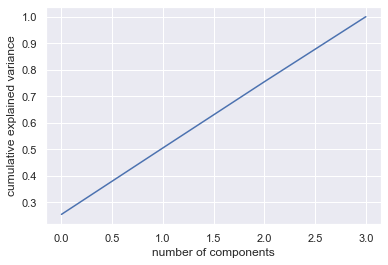

In [91]:
pca = PCA().fit(scaled)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [92]:
pca.components_

array([[-0.01275646, -0.70855675,  0.3943661 ,  0.5850299 ],
       [ 0.69471778, -0.0351655 ,  0.58269504, -0.42023456],
       [-0.71682712,  0.03547578,  0.58977294, -0.37022728],
       [ 0.05799456,  0.70388365,  0.39637073,  0.5865788 ]])

In [100]:
def run_lda(errorID = 'all'):

    complete, continuous = set_error(errorID)
    
    sc = StandardScaler()
    scaled = sc.fit_transform(continuous)
    
    lda = LDA(n_components = 1)
    X = scaled
    Y = complete['pre_error']
    projected = lda.fit_transform(X, Y)#.transform(X)

    colors = ['navy', 'darkorange']
    #lw = 2
    projected
    df_proj = pd.DataFrame(projected, index = complete.index, columns=['projected'])
    df_scaled = pd.DataFrame(scaled, index = complete.index)
    df = df_scaled.join(df_proj)
    df = df.join(complete['pre_error'])
    df
    
    df2 = df
    df2 = df2.reset_index()
    df2=df2.set_index(['machineID', 'pre_error'])
    df2 = df2.groupby(['pre_error']).mean().reset_index()
    #df2
    sns.barplot(x='pre_error', y='projected', data=df2)
    return (df)



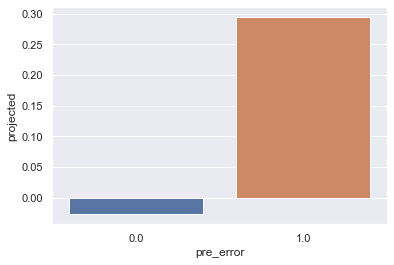

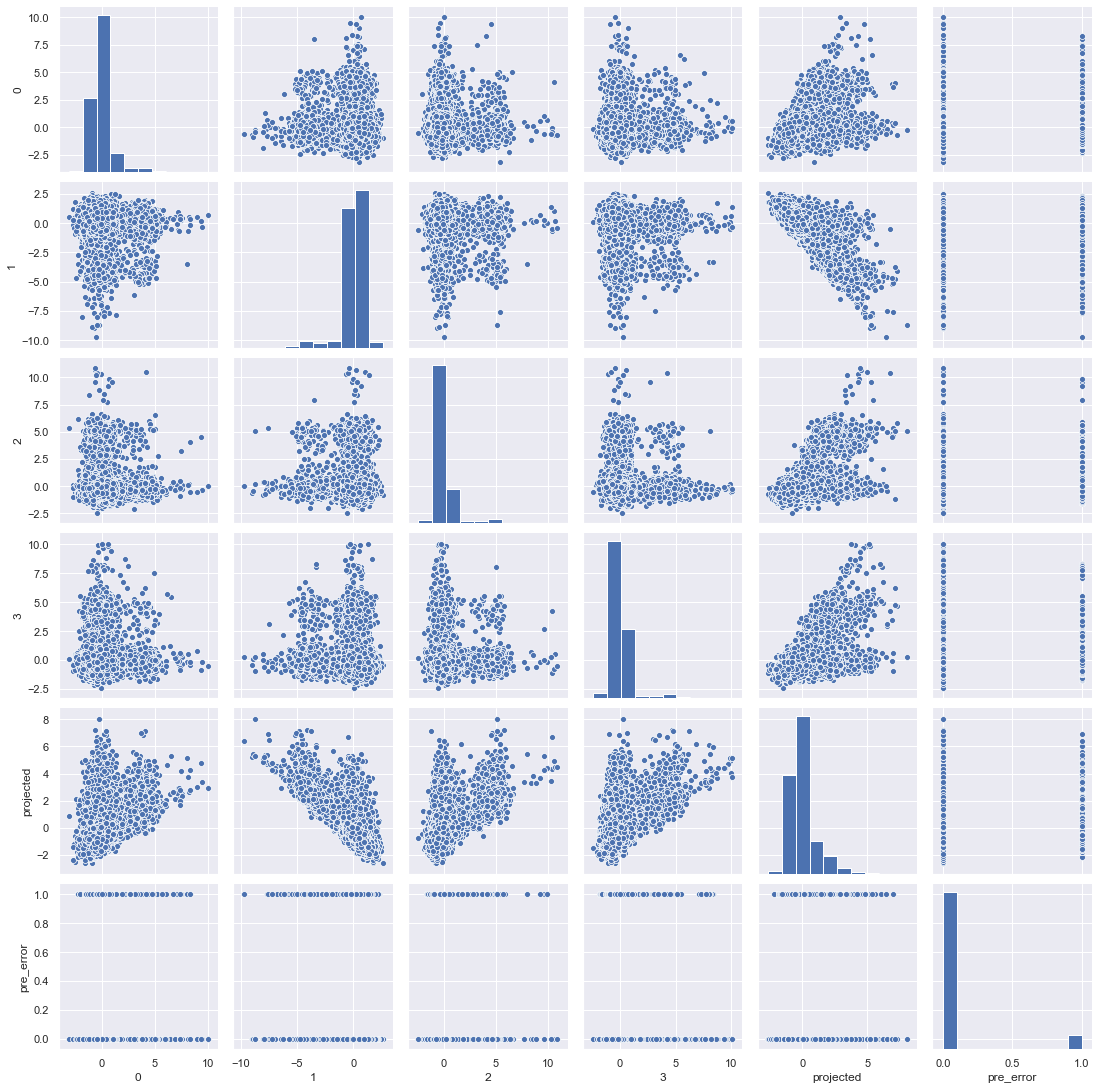

In [103]:
df = run_lda('all')
sns.pairplot(df, vars=list(df.columns))

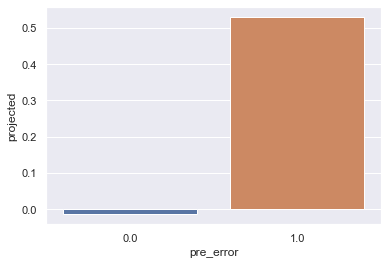

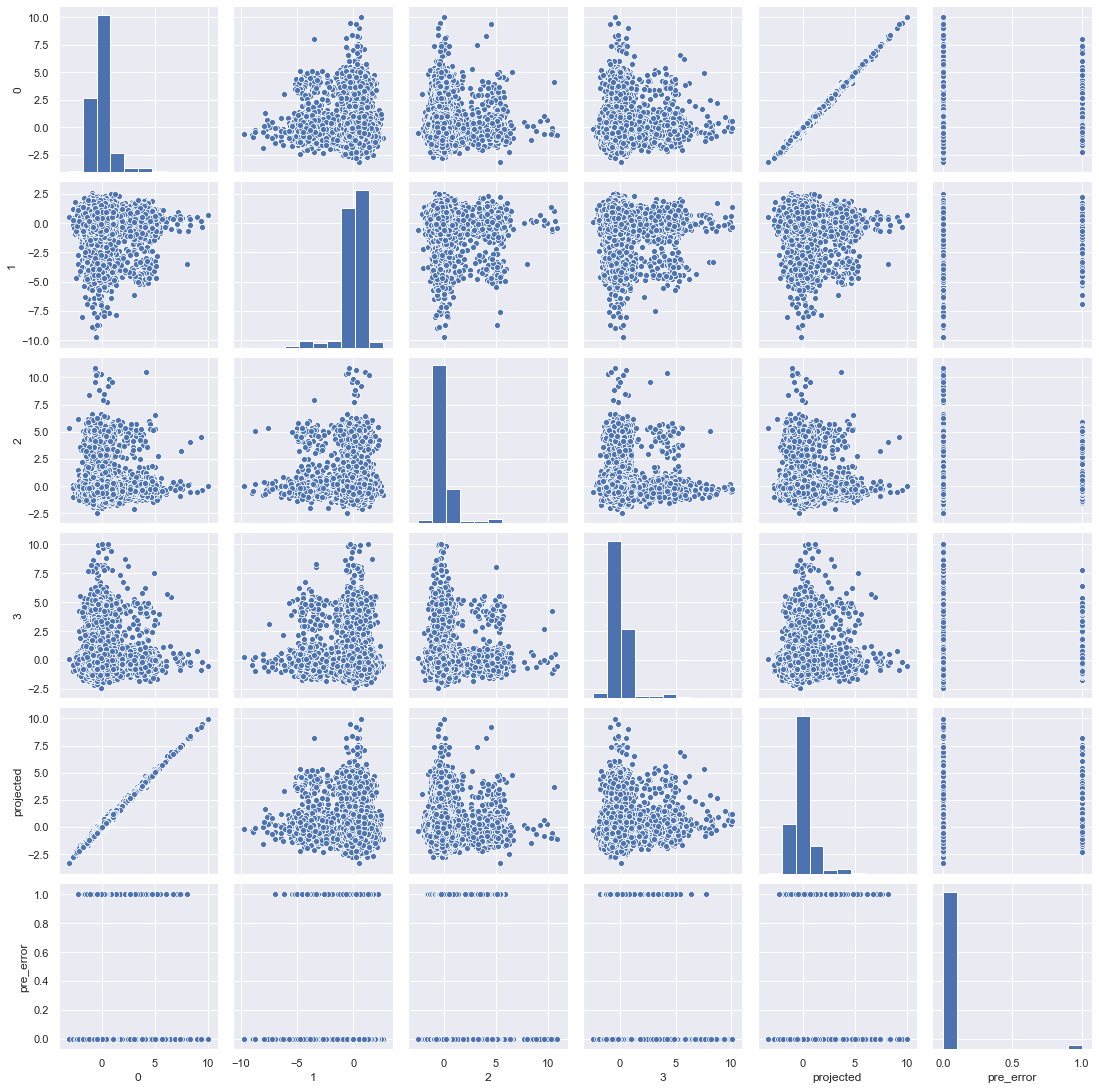

In [107]:
df = run_lda('error1')
sns.pairplot(df, vars=list(df.columns))

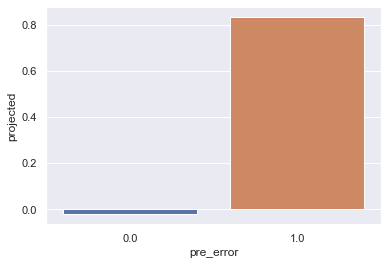

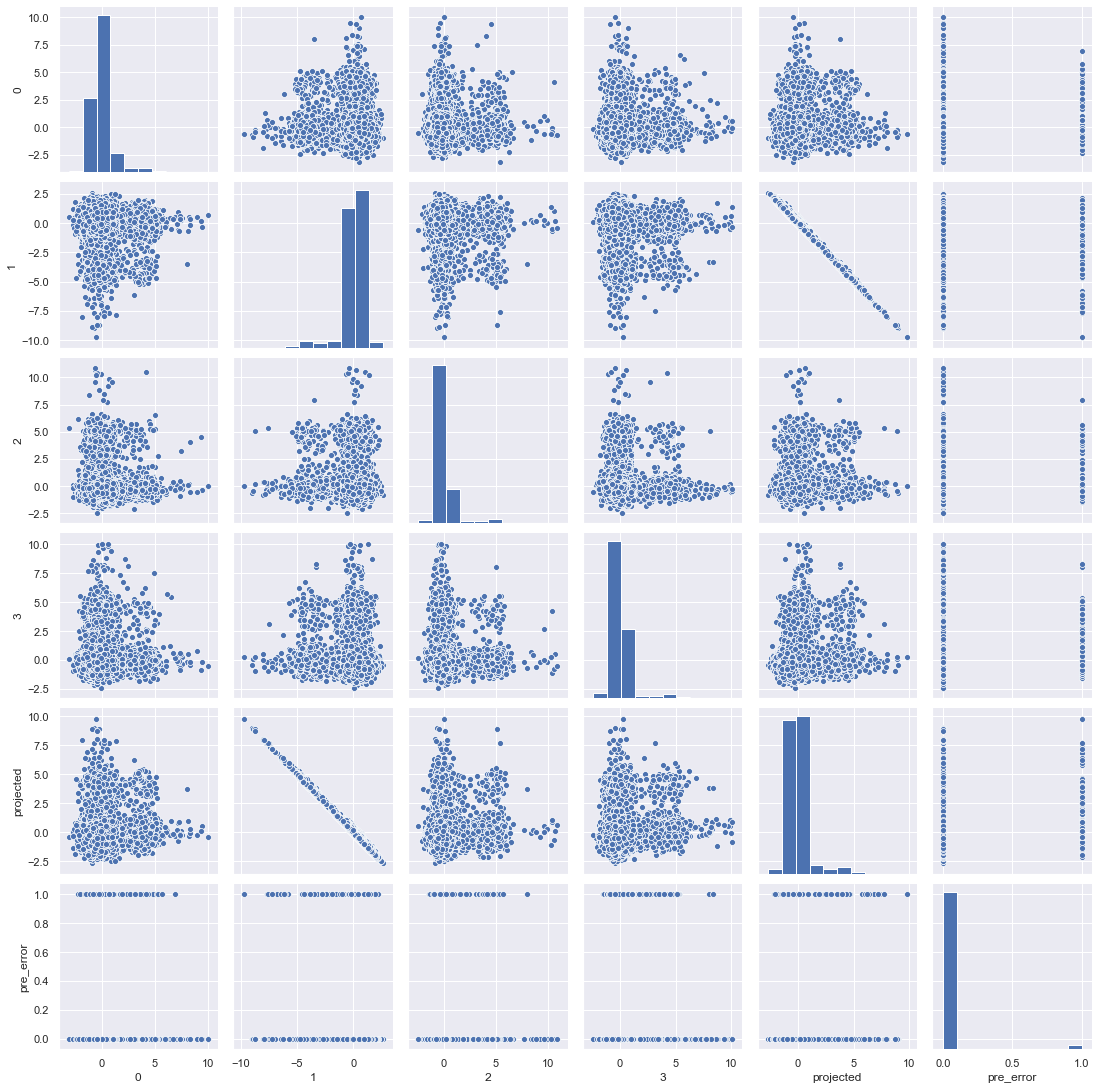

In [108]:
df = run_lda('error2')
sns.pairplot(df, vars=list(df.columns))

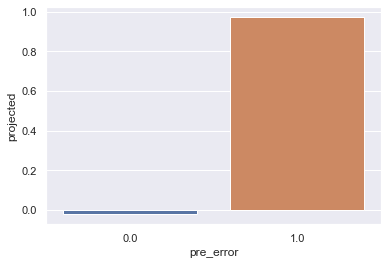

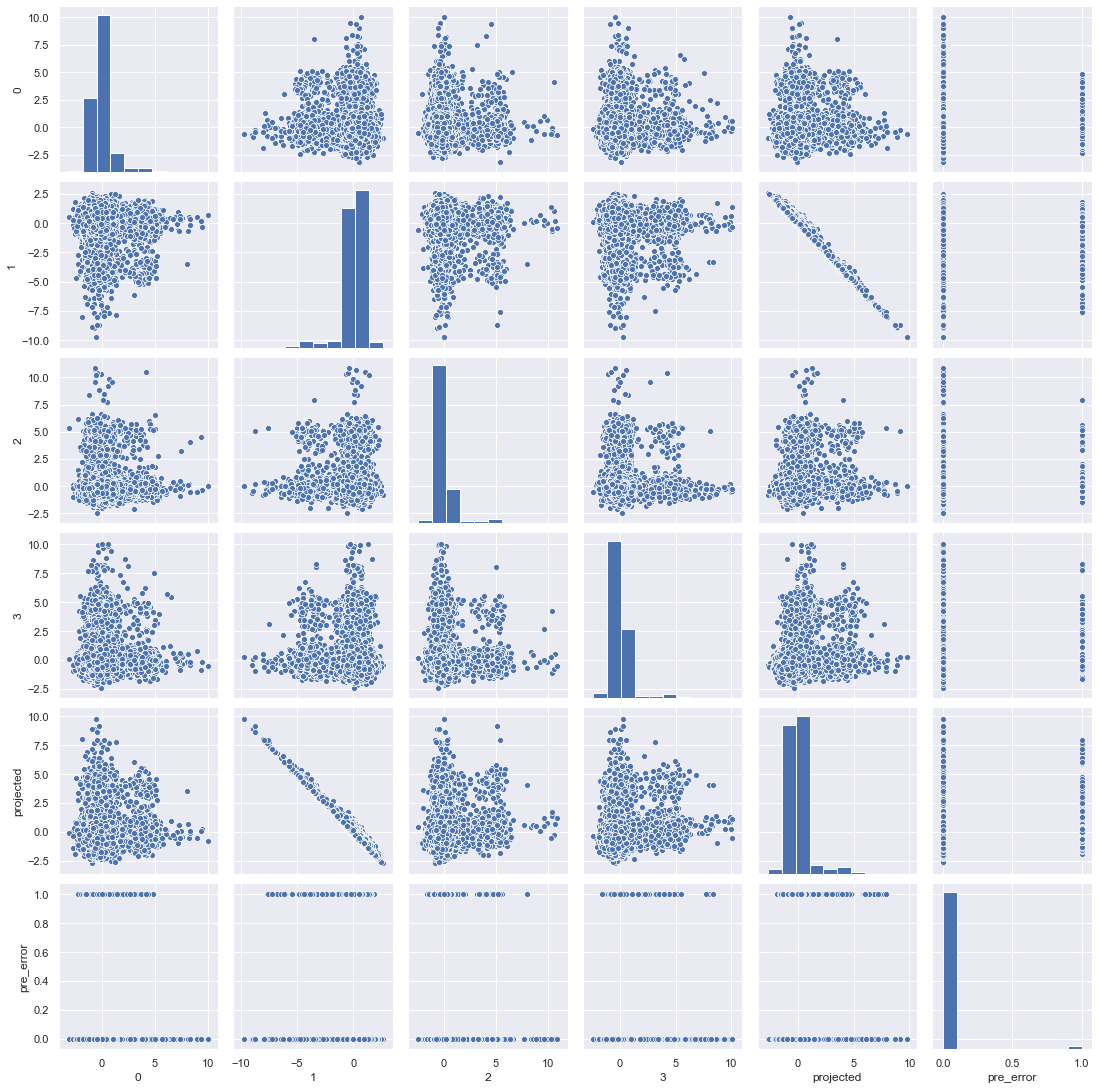

In [109]:
df = run_lda('error3')
sns.pairplot(df, vars=list(df.columns))

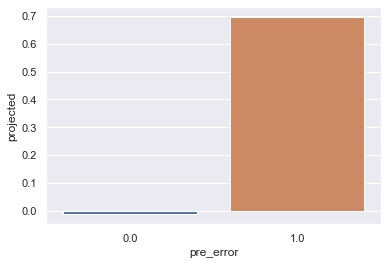

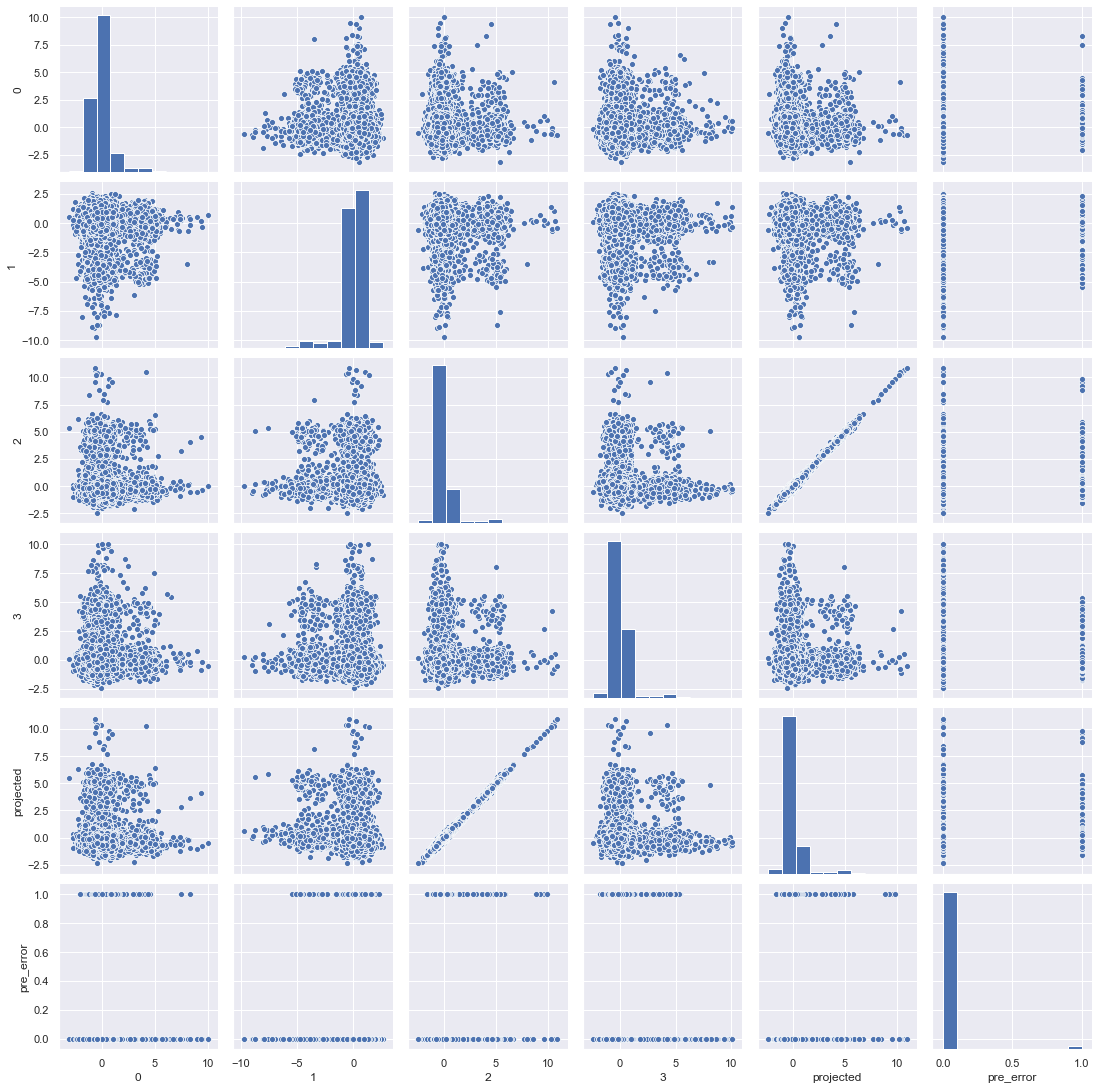

In [110]:
df = run_lda('error4')
sns.pairplot(df, vars=list(df.columns))

In [125]:
complete, continuous = set_error('error3')
complete.has_error = complete.has_error.astype(int)
#joined.error_count = joined.error_count.astype(int)
complete.drop(columns='error_count')
X = complete.iloc[:,:4]
target = complete['pre_error'].copy()
#target = target.reset_index(drop=True)

regr_pls = PLSRegression(n_components = 3)
PLS_score_X, PLS_score_Y=regr_pls.fit_transform(X,target)
PLS_loads=regr_pls.x_loadings_
PLS_score_X

array([[-0.2718797 , -0.47801306, -0.73783921],
       [ 0.11538223, -0.72830743, -0.21956798],
       [ 0.36711095,  2.8441094 , -0.93785615],
       ...,
       [ 0.53654008, -0.38037393, -0.53616336],
       [ 0.97231253, -0.37770903, -0.17878827],
       [-0.16678299,  1.1025546 ,  0.25103419]])

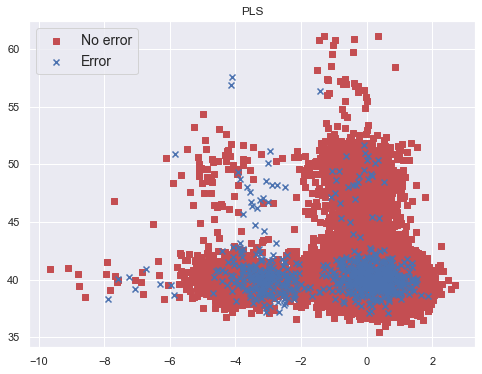

In [126]:
# Plot the transformed data
markers = ['s','x']
colors = ['r','b']
fig = plt.figure(figsize=(8,6))
ax0 = fig.add_subplot(111)
for l,m,c in zip(np.unique(target),markers,colors):
    if l==1:
        lab = 'Error'
    else:
        lab= 'No error'
    ax0.scatter(PLS_score_X.T[0][target==l],X['vibration'][target==l],c=c,marker=m, label=lab)
    
plt.title('PLS')
plt.legend(fontsize=14)

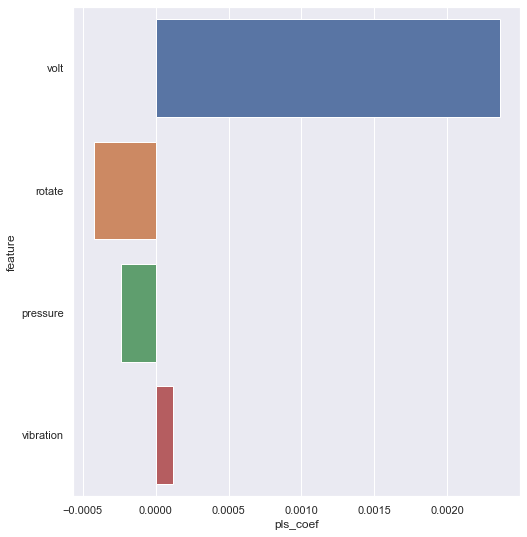

In [26]:
#https://nirpyresearch.com/variable-selection-method-pls-python/
# Define the PLS regression object
#data = pd.read_csv('./data/peach_spectra+brixvalues.csv')
#X = data.values[:,1:]
#y = data['Brix']

complete, continuous = set_error('error1')

X=complete.iloc[:,:4]
y=complete['pre_error']

pls = PLSRegression(n_components=4)
# Fit data
pls.fit(X, y)
# Plot spectra
plt.figure(figsize=(8,9))

pls_score_x, pls_score_y = pls.transform(X, y)

pls.coef_[:,0]
pls_score_x
plsc = pd.DataFrame(pls_score_x.T[0], index=joined.index, columns=['pls_score'])
pls_df = joined.iloc[:,:4]
pls_df = pls_df.join(plsc)
pls_df
pls.coef_
pls_coef_plot = pd.DataFrame(zip(X.columns.tolist(), pls.coef_[:,0]), columns=['feature', 'pls_coef'])

sns.barplot(x="pls_coef", y="feature", data=pls_coef_plot)
#sns.pairplot(pls_df, vars=list(pls_df.columns))

#with plt.style.context(('ggplot')):
#    ax1 = plt.subplot(211)
#    plt.plot(, X1.T)
#    plt.ylabel('First derivative absorbance spectra')
#    ax2 = plt.subplot(212, sharex=ax1)
#    plt.plot(wl, np.abs(pls.coef_[:,0]))
#    plt.xlabel('Wavelength (nm)')
#    plt.ylabel('Absolute value of PLS coefficients')
#    plt.show()


In [221]:
#https://nirpyresearch.com/variable-selection-method-pls-python/

def pls_variable_selection(X, y, max_comp):
    
    # Define MSE array to be populated
    mse = np.zeros((max_comp,X.shape[1]))
    # Loop over the number of PLS components
    for i in range(max_comp):
        
        # Regression with specified number of components, using full spectrum
        pls1 = PLSRegression(n_components=i+1)
        pls1.fit(X, y)
        
        # Indices of sort spectra according to ascending absolute value of PLS coefficients
        sorted_ind = np.argsort(np.abs(pls1.coef_[:,0]))
        
        # Sort spectra accordingly 
        Xc = X.iloc[:,sorted_ind]
        
        # Discard one wavelength at a time of the sorted spectra,
        # regress, and calculate the MSE cross-validation
        for j in range(Xc.shape[1]-(i+1)):
            pls2 = PLSRegression(n_components=i+1)
            pls2.fit(Xc.iloc[:, j:], y)
          
            y_cv = cross_val_predict(pls2, Xc.iloc[:, j:], y, cv=5)
            mse[i,j] = mean_squared_error(y, y_cv)
    
        comp = 100*(i+1)/(max_comp)
        stdout.write("\r%d%% completed" % comp)
        stdout.flush()
    stdout.write("\n")
    # # Calculate and print the position of minimum in MSE
    mseminx,mseminy = np.where(mse==np.min(mse[np.nonzero(mse)]))
    print("Optimised number of PLS components: ", mseminx[0]+1)
    print("discarded features",mseminy[0])
    print('Optimised MSEP ', mse[mseminx,mseminy][0])
    stdout.write("\n")
    # plt.imshow(mse, interpolation=None)
    # plt.show()
    # Calculate PLS with optimal components and export values
    pls = PLSRegression(n_components=mseminx[0]+1)
    pls.fit(X, y)
    #pls_score_x, pls_score_y = pls.fit_transform(X, y)
    
    #this sorts best feature last
    sorted_ind = np.argsort(np.abs(pls.coef_[:,0]))
    Xc = X.iloc[:,sorted_ind]
    
    y_cv = cross_val_predict(pls, Xc, y, cv=5)
    
    opt_x_component = Xc.iloc[:,mseminy[0]:]
    pls_score_x_df = pd.DataFrame(y_cv.T[0], index=df.index, columns=['pls_score'])

    opt_x_component = opt_x_component.join(pls_score_x_df) #best feature last
    #opt_x_component = opt_x_component.join(joined['error_window'])

    return(opt_x_component,y_cv, mseminx[0]+1,mseminy[0], sorted_ind)

100% completed
Optimised number of PLS components:  1
discarded features 2
Optimised MSEP  0.025406239787995936



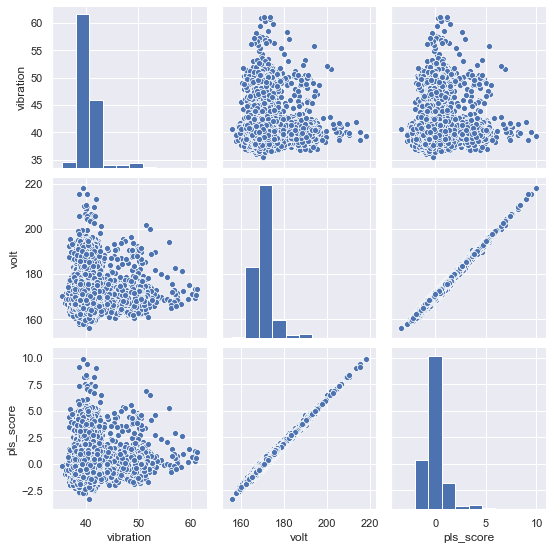

In [113]:
complete, continuous = set_error('error1')

X=complete.iloc[:,:4]
y=complete['pre_error']

opt_x_component, score_x, ncomp, selected, sorted_ind = pls_variable_selection(X, y, 4)
sns.pairplot(opt_x_component, vars=list(opt_x_component.columns))




100% completed
Optimised number of PLS components:  1
discarded features 2
Optimised MSEP  0.02475281956046241



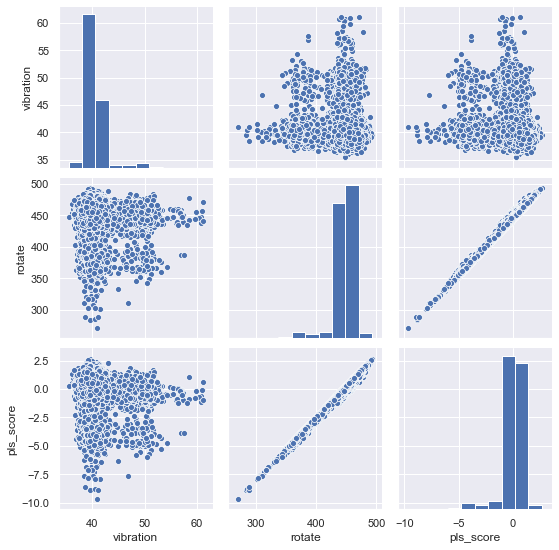

In [115]:
complete, continuous = set_error('error2')


X=complete.iloc[:,:4]
y=complete['pre_error']


opt_x_component, score_x, ncomp, selected, sorted_ind = pls_variable_selection(X, y, 4)
sns.pairplot(opt_x_component, vars=list(opt_x_component.columns))


100% completed
Optimised number of PLS components:  2
discarded features 1
Optimised MSEP  0.003221386611905231

selected  [3 1 0 2]


,,pressure
datetime,machineID,
2015-01-01,1,98.522345
2015-01-02,1,98.454608
2015-01-03,1,97.998233
2015-01-04,1,101.452266
2015-01-05,1,102.363114
...,...,...
2015-12-28,100,97.864404
2015-12-29,100,97.531682
2015-12-30,100,98.415400


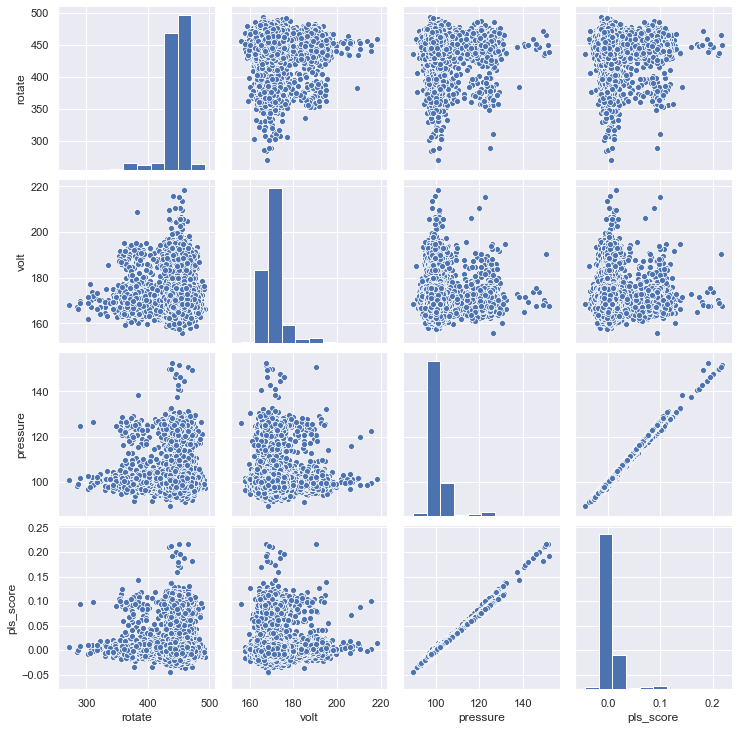

In [236]:
complete, continuous = set_failure('comp3')


X=complete.iloc[:,:4]
y=complete['pre_failure']


opt_x_component, score_x, ncomp, selected, sorted_ind = pls_variable_selection(X, y, 4)
sns.pairplot(opt_x_component, vars=list(opt_x_component.columns))
print("selected ", sorted_ind)
X.iloc[:,sorted_ind].iloc[:,-1:]

100% completed
Optimised number of PLS components:  1
discarded features 2
Optimised MSEP  0.004287596085660214



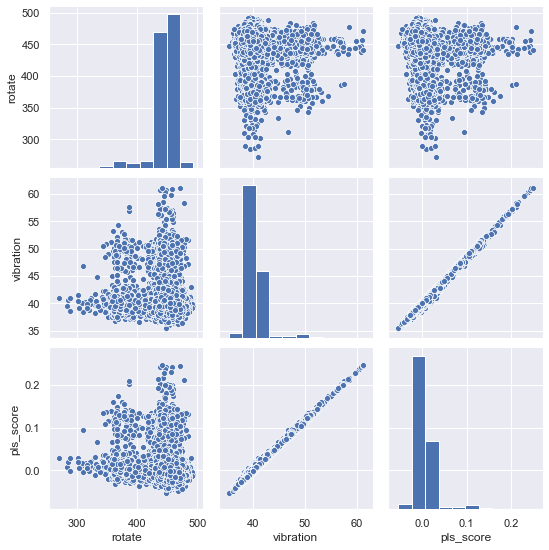

In [235]:
complete, continuous = set_failure('comp4')


X=complete.iloc[:,:4]
y=complete['pre_failure']


opt_x_component, score_x, ncomp, selected, sorted_ind = pls_variable_selection(X, y, 4)
sns.pairplot(opt_x_component, vars=list(opt_x_component.columns))


In [231]:
def run_ttest(failureID = 'all'):
    
    complete, continuous = set_failure(failureID)

    X=complete.iloc[:,:4]
    y=complete['pre_failure']


    opt_x_component, score_x, ncomp, selected, sorted_ind = pls_variable_selection(X, y, 4)
    
    #last element is the top feature
    selected_index = sorted_ind[len(sorted_ind) - 1];
    
    #optimal_component = opt_x_component.join(complete.loc[:,('pre_error','has_error')])
    
    error_window = complete[complete['pre_failure'] == 1]

    #filter out the error window and errors for non-error runs
    non_error_window = complete[complete['pre_failure'] < 1] 
    non_error_window = non_error_window[non_error_window['has_failure'] < 1] 
    
    window_count = error_window['pre_failure'].count()

    x=random.sample(non_error_window.iloc[:,selected_index].tolist(), window_count)
    y=error_window.iloc[:,selected_index].tolist()

    t,p=stats.ttest_ind(x, y)
    return (t,p,opt_x_component, sorted_ind)



In [238]:
t,p, ew, si = run_ttest('comp3')
print("ttest_ind: t=%g p=%g" % (t,p))
#print("selected ", si)
#ew

100% completed
Optimised number of PLS components:  1
discarded features 2
Optimised MSEP  0.003431150555405236

ttest_ind: t=-1.86168 p=0.0638214
